In [2]:
import pandas as pd

# Load CSV
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# First look at data
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check column types
df.dtypes

# Check missing values
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
# Convert TotalCharges to numeric (errors='coerce' will turn invalid values to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop any rows where TotalCharges is NaN (if any)
df = df.dropna()

# Check again
df.info()


<class 'pandas.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   str    
 1   gender            7032 non-null   str    
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   str    
 4   Dependents        7032 non-null   str    
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   str    
 7   MultipleLines     7032 non-null   str    
 8   InternetService   7032 non-null   str    
 9   OnlineSecurity    7032 non-null   str    
 10  OnlineBackup      7032 non-null   str    
 11  DeviceProtection  7032 non-null   str    
 12  TechSupport       7032 non-null   str    
 13  StreamingTV       7032 non-null   str    
 14  StreamingMovies   7032 non-null   str    
 15  Contract          7032 non-null   str    
 16  PaperlessBilling  7032 non-null   str    
 17  PaymentMeth

In [5]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [6]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
print(contract_churn)

Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


In [7]:
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
print(payment_churn)

Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


In [8]:
df['CustomerValue'] = df['MonthlyCharges'] * df['tenure']

# Average value by churn
value_churn = df.groupby('Churn')['CustomerValue'].mean()
print(value_churn)

Churn
No     2555.203283
Yes    1531.608828
Name: CustomerValue, dtype: float64


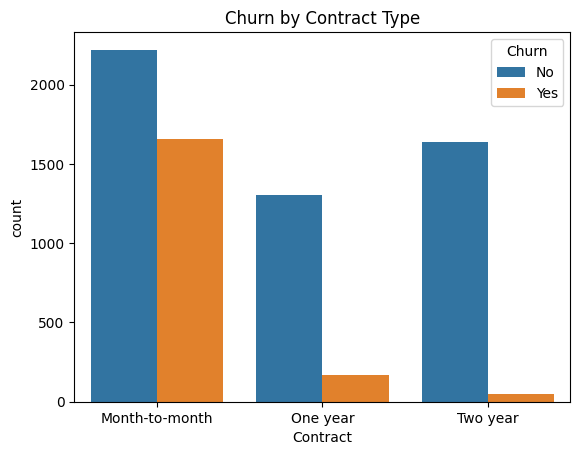

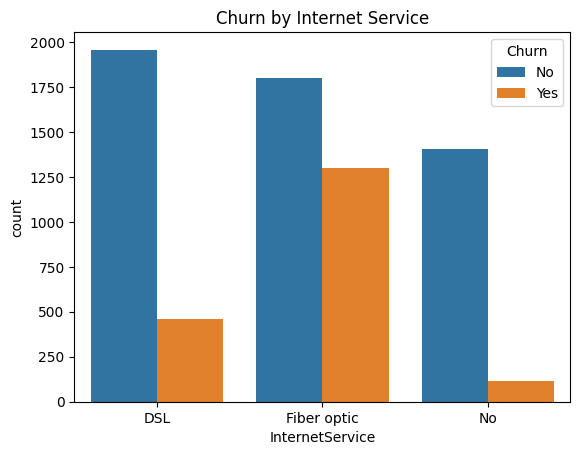

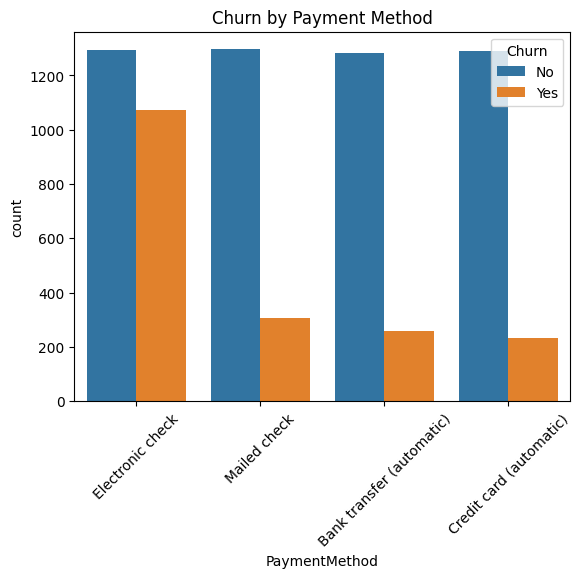

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn by Contract
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()

# Churn by Internet Service
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")
plt.show()

# Churn by Payment Method
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.show()


In [10]:
df.to_csv("data/clean_churn_data.csv", index=False)

In [11]:
import sqlite3

# Create connection to SQLite DB
conn = sqlite3.connect("churn.db")

# Load cleaned dataframe into SQL table
df.to_sql("churn", conn, if_exists="replace", index=False)

print("Data loaded into SQLite!")


Data loaded into SQLite!


In [12]:
df.to_sql("churn", conn, if_exists="replace", index=False)

7032